In [62]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


# Prepare data.

In [173]:
#importing the datasets
data1 = r'D:\Python\Side Project\OTT Analysis\MoviesOnStreamingPlatforms_updated.csv'
data2 = r'D:\Python\Side Project\OTT Analysis\tv_shows.csv'

mv_data = pd.read_csv(data1, index_col = 0)
tvshows_data = pd.read_csv(data2, index_col = 0)

In [172]:
#have a quick look of the data frame and size
mv_data.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0


In [166]:
mv_data.shape

(9515, 16)

In [163]:
tvshows_data.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1


In [164]:
tvshows_data.shape

(5368, 11)

# Clean& process data.

In [168]:
#concat the two dataframe and change the data type of 'IMDb' and 'Rotten Tomatoes'
movies_data = pd.concat([mv_data, tvshows_data])
movies_data['IMDb'] = movies_data['IMDb'].str.replace('/10',"").astype('float')
movies_data['Rotten Tomatoes'] = movies_data['Rotten Tomatoes'].str.replace('/100',"").astype('float')
movies_data['IMDb'] = movies_data['IMDb'].fillna(0)
movies_data['Rotten Tomatoes'] = movies_data['Rotten Tomatoes'].fillna(0)
movies_data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98.0,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97.0,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94.0,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7,94.0,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,0.0,10.0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
5364,5714,Mexico Untamed,2018,NaN,0.0,10.0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
5365,5715,Wild Centeral America,2020,NaN,0.0,10.0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
5366,5716,Wild Russia,2018,NaN,0.0,10.0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


In [170]:
#checking the data types for each column.
movies_data.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [68]:
#counting the number of cells with empty values in every column
pd.isnull(movies_data).sum()

ID                    0
Title                 0
Year                  0
Age                6304
IMDb                  0
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors          5779
Genres             5484
Country            5622
Language           5681
Runtime            5687
dtype: int64

In [175]:
##Age& language: Since 30-40% of the movies don`t have data for Age in the dataset, we will replace the NaN values with 'Unknown':
movies_data.Age = movies_data.Age.fillna('Unknown')
movies_data.Language = movies_data.Language.fillna('Unknown')

#After this correction we only have numeric values on the Age column
movies_data.Age.value_counts()

Unknown    6304
18+        3130
7+         1921
16+        1271
all        1250
13+        1007
Name: Age, dtype: int64

In [176]:
movies_data.describe()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,9196.000000
mean,4057.179265,2009.300208,5.948404,51.238662,0.380703,0.179265,0.399382,0.085534,0.360680,95.199435
std,2589.022412,16.652795,2.098097,16.113494,0.485576,0.383587,0.489788,0.279684,0.480214,29.654047
min,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1864.500000,2009.000000,5.400000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
50%,3826.000000,2016.000000,6.500000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,5794.500000,2018.000000,7.300000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,109.000000
max,9515.000000,2021.000000,9.800000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,566.000000


In [177]:
#checking if there are movies with more than 300 minutes of runtime
movies_data[movies_data.Runtime > 300]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
44,45,No Direction Home: Bob Dylan,2005,all,8.5,87.0,1,0,0,0,0,Martin Scorsese,"Documentary,Biography","United Kingdom,United States,Japan",English,359.0
2098,2099,DNA,2020,18+,5.9,51.0,1,0,0,0,0,NaN,"Crime,Drama,Mystery,Thriller","Denmark,France","Danish,English,Polish,French",321.0
3888,3889,1900,1976,18+,7.7,71.0,0,1,1,0,0,Bernardo Bertolucci,"Drama,History","Italy,France,West Germany",Italian,317.0
7436,7437,Custer's Last Stand,1936,Unknown,4.7,43.0,0,0,1,0,0,Elmer Clifton,"Adventure,History,Romance,War,Western",United States,English,328.0
8746,8747,Stargirl,2020,7+,6.2,74.0,0,0,0,1,0,NaN,"Action,Adventure,Crime,Drama,Fantasy,Sci-Fi",United States,English,566.0


In [178]:
#manually correct the duration of these movies by checking wiki
movies_data.loc[movies_data.Title == 'No Direction Home: Bob Dylan', ['Runtime']] = 202
movies_data.loc[movies_data.Title == 'DNA', ['Runtime']] = 92
movies_data.loc[movies_data.Title == '1900', ['Runtime']] = 317
movies_data.loc[movies_data.Title == "Custer's Last Stand", ['Runtime']] = 84
movies_data.loc[movies_data.Title == 'Stargirl', ['Runtime']] = 96

In [179]:
movies_data.describe()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,9196.000000
mean,4057.179265,2009.300208,5.948404,51.238662,0.380703,0.179265,0.399382,0.085534,0.360680,95.079817
std,2589.022412,16.652795,2.098097,16.113494,0.485576,0.383587,0.489788,0.279684,0.480214,28.939425
min,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1864.500000,2009.000000,5.400000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
50%,3826.000000,2016.000000,6.500000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,5794.500000,2018.000000,7.300000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,109.000000
max,9515.000000,2021.000000,9.800000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,317.000000


In [180]:
pd.isnull(movies_data).sum()

ID                    0
Title                 0
Year                  0
Age                   0
IMDb                  0
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors          5779
Genres             5484
Country            5622
Language              0
Runtime            5687
dtype: int64

# Which languages are mostly represented in the streaming service of the dataset?

<Axes: title={'center': 'Top Movie Languages on Streaming Services'}>

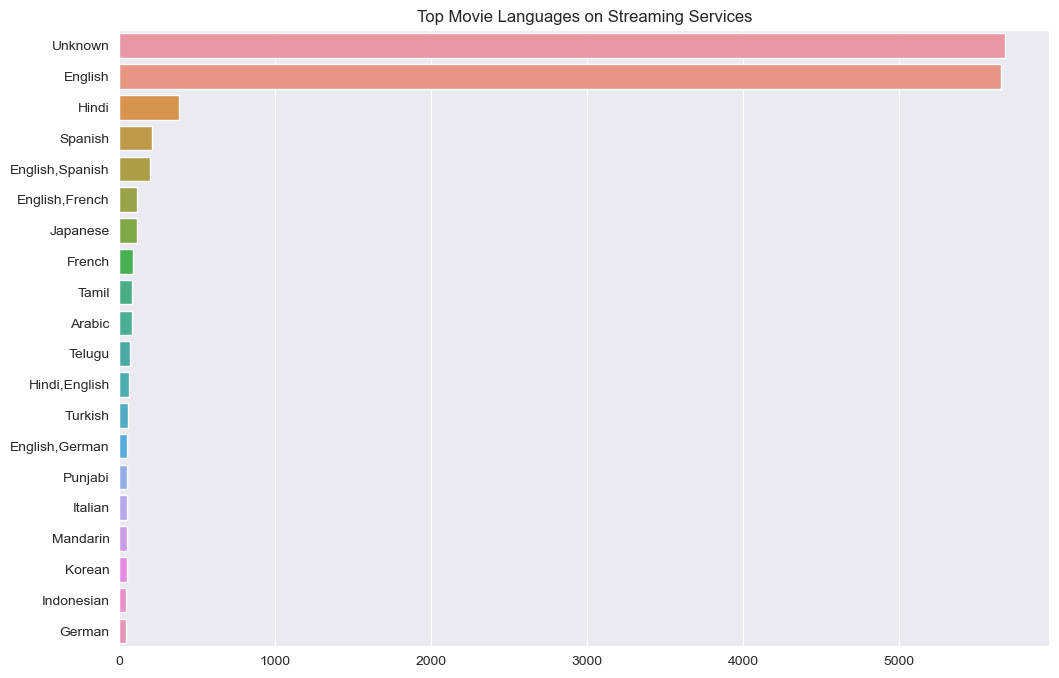

In [91]:
#counting and assigning the 20 top values to a variable
languages = movies_data.Language.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('Top Movie Languages on Streaming Services')
sns.barplot(x=languages.values, y=languages.index)

# Does the catalogs include many old movies?

In [78]:
movies_data.Year.unique()

array([2019, 2016, 2020, 2001, 2018, 2017, 2004, 2014, 2015, 2006, 1991,
       2012, 2010, 2011, 2013, 2005, 1998, 2002, 2009, 1971, 2003, 2007,
       1975, 1988, 2008, 1974, 1979, 1997, 1990, 2021, 1984, 2000, 1993,
       1994, 1999, 1976, 1964, 1954, 1982, 1986, 1992, 1995, 1987, 1989,
       1980, 1996, 1958, 1981, 1977, 1983, 1970, 1963, 1985, 1972, 1962,
       1966, 1956, 1969, 1973, 1960, 1959, 1978, 1968, 1940, 1941, 1965,
       1923, 1950, 1953, 1957, 1955, 1946, 1936, 1952, 1967, 1935, 1951,
       1925, 1947, 1945, 1948, 1939, 1942, 1932, 1937, 1919, 1949, 1934,
       1931, 1922, 1927, 1933, 1920, 1961, 1944, 1943, 1915, 1929, 1938,
       1914, 1930, 1928, 1916, 1904], dtype=int64)

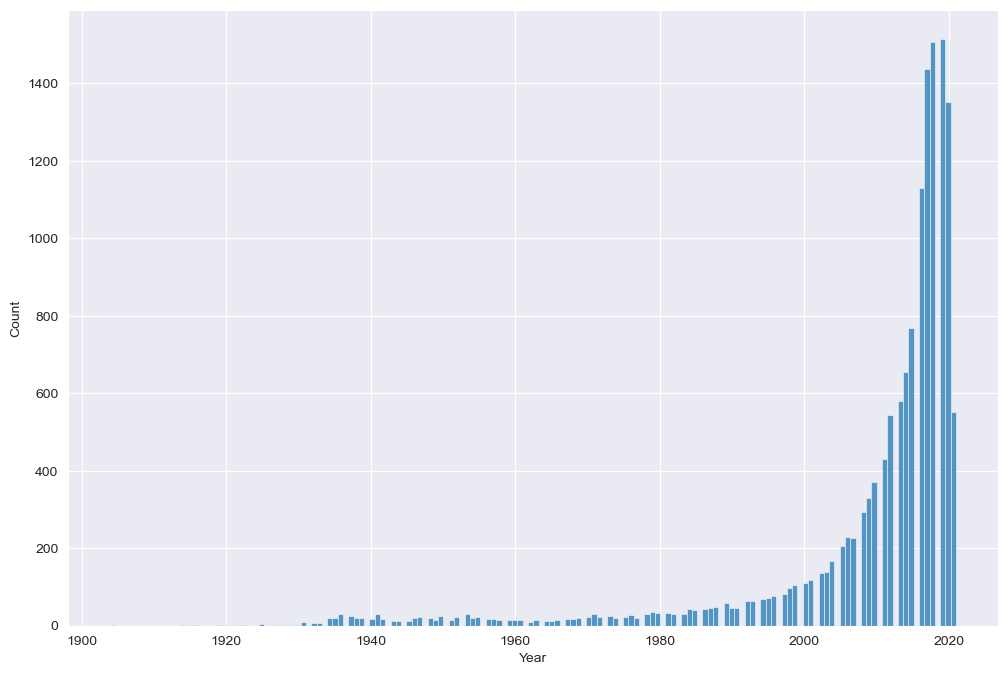

In [94]:
#plotting the Year column data into a Seaborn histogram
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.histplot(movies_data.Year,kde=False);

# Is there a specific genre that is more present?

In [183]:
#creating helper function that receives a column and returns a new dataframe 
#containing bolean values for each possible option 

def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [96]:
#creating a new dataframe with the splitmulticolumn function
genres_df = split_multicolumn(movies_data.Genres)

#performing a sum operation of all True values
movie_genres = genres_df.sum().sort_values(ascending=False)

C:\Users\lilyn\AppData\Local\Temp\ipykernel_27560\4177582443.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in genres[genres.notnull()].iteritems():


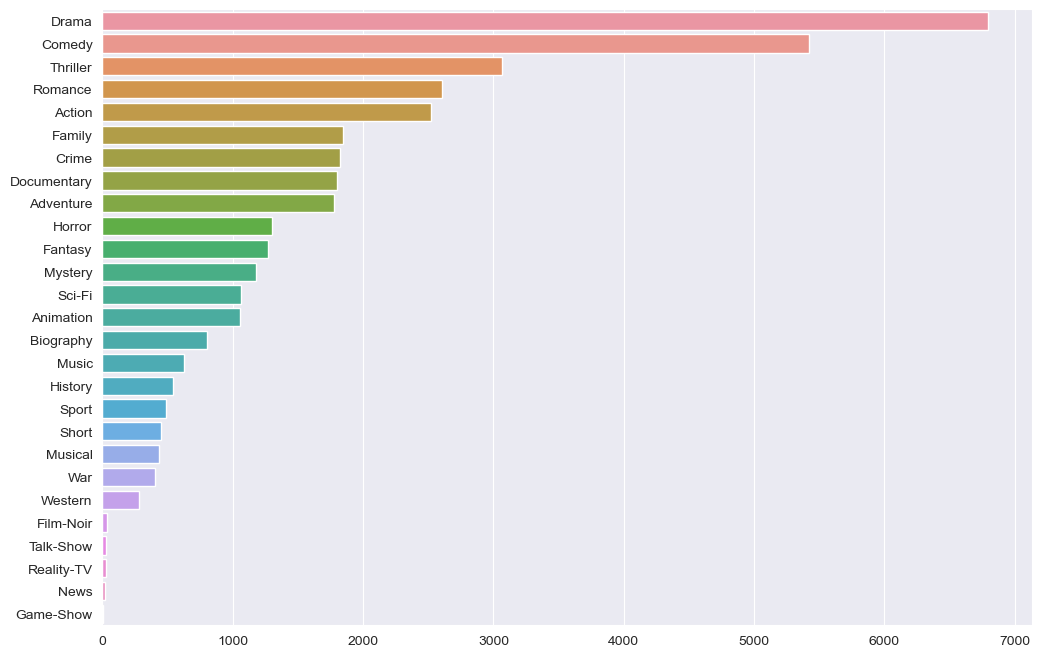

In [97]:
#plotting into a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

# Additional Questions
1. Biggest number of movies and tv shows
2. More recent movies and tv shows
3. Most popular movie genres in each catalog
4. Better suited for for children or adults
5. The best for old movies and tv shows
6. Best IMDb / Rotten Tomatoes ratings

In [99]:
#Creating different dataframes for each platform
Hulu_df = movies_data.loc[(movies_data['Hulu'] > 0) ]
Disney_df = movies_data.loc[(movies_data['Disney+'] > 0) ]
PrimeVideo_df = movies_data.loc[(movies_data['Prime Video'] > 0)  ]
Netflix_df = movies_data.loc[(movies_data['Netflix'] > 0)  ]

# Q1: Biggest number of movies and tv shows

In [104]:
#Selecting the specific columns from the Dataset and saving into a new dataframe
chosen_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platforms_df = movies_data[chosen_columns]
platforms_df

,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
5363,0,0,0,1
5364,0,0,0,1
5365,0,0,0,1
5366,0,0,0,1


In [105]:
#Counting all values for each platform
platforms = platforms_df.sum()
platforms

Netflix        5666
Hulu           2668
Prime Video    5944
Disney+        1273
dtype: int64

<Axes: title={'center': 'Available Movies and TV Shows'}>

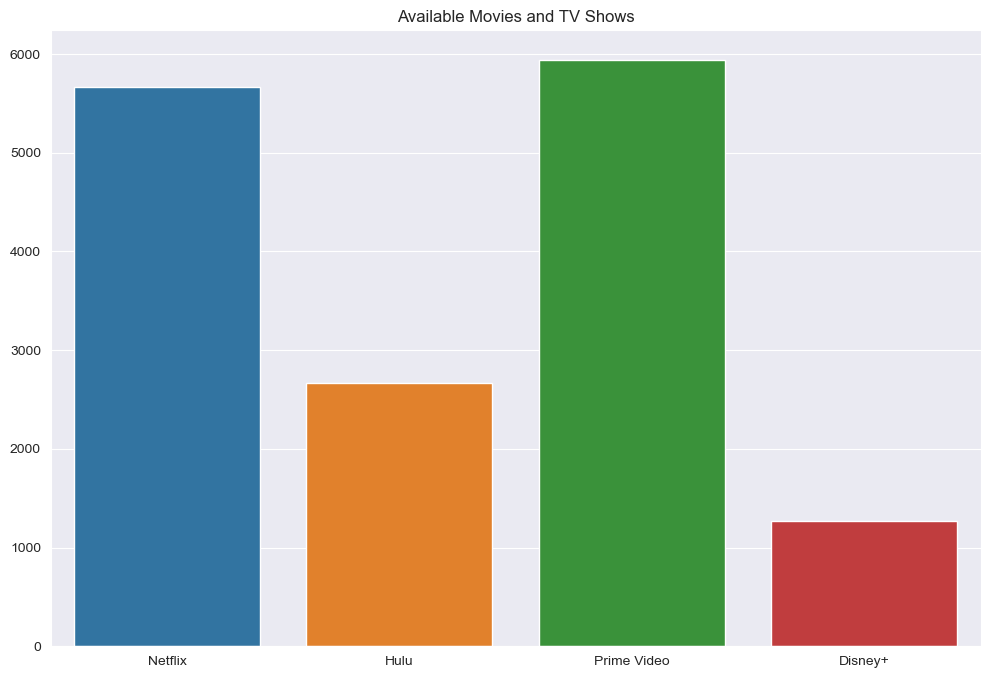

In [103]:
#Plotting into a bar plot using Seaborn

plt.figure(figsize=(12,8))
plt.title('Available Movies and TV Shows')

sns.barplot(x=platforms.index, y=platforms.values)

# Q2: More recent movies and tv shows

In [116]:
#filtering movies dating from 2010 beyond 
recent_movies_df = movies_data[movies_data.Year > 2010]
recent_movies_df.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98.0,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97.0,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0


In [117]:
#calculating the totals for each column
recent_movies = recent_movies_df[chosen_columns].sum()
recent_movies.head(2)

Netflix    4902
Hulu       1838
dtype: int64

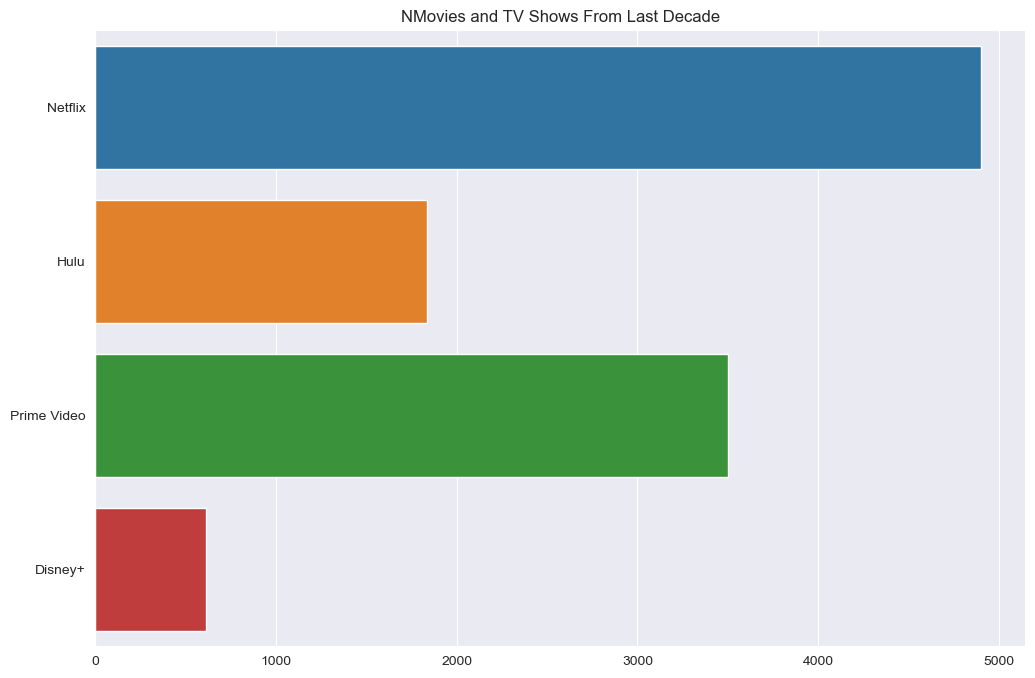

In [118]:
#ploting into a barplot using seaborn
plt.figure(figsize=(12,8))
plt.title('NMovies and TV Shows From Last Decade')
sns.barplot(x=recent_movies.values, y=recent_movies.index)
plt.show()

# Q3: What are the most popular movie genres in each catalog?

In [119]:
#Joining each platform's dataframe with genres_df
hulu_genres_df = Hulu_df.join(genres_df)
netflix_genres_df = Netflix_df.join(genres_df)
primevideo_genres_df = PrimeVideo_df.join(genres_df)
disney_genres_df = Disney_df.join(genres_df)

In [120]:
#creating a python list with the names of columns we want to select
chosen_columns = ['Action', 'Adventure', 'Sci-Fi',
       'Thriller', 'Comedy', 'Western', 'Animation', 'Family', 'Biography',
       'Drama', 'Music', 'War', 'Crime', 'Fantasy', 'Romance', 'History',
       'Mystery', 'Horror', 'Sport', 'Documentary', 'Musical', 'News', 'Short',
       'Reality-TV', 'Talk-Show', 'Game-Show', 'Film-Noir']

In [121]:
#selecting the chosen columns on each dataframe
hulu_genres = hulu_genres_df[chosen_columns]
netflix_genres = netflix_genres_df[chosen_columns]
primevideo_genres = primevideo_genres_df[chosen_columns]
disney_genres = disney_genres_df[chosen_columns]

In [122]:
#since each dataframe above contains only boolean values, now we can use sum() to find
#the quantities for each platform and save it into a new variable we will use in our barplot:
hulu_genres_list = hulu_genres.sum().sort_values(ascending=False).head(10)
netflix_genres_list = netflix_genres.sum().sort_values(ascending=False).head(10)
primevideo_genres_list = primevideo_genres.sum().sort_values(ascending=False).head(10)
disney_genres_list = disney_genres.sum().sort_values(ascending=False).head(10)

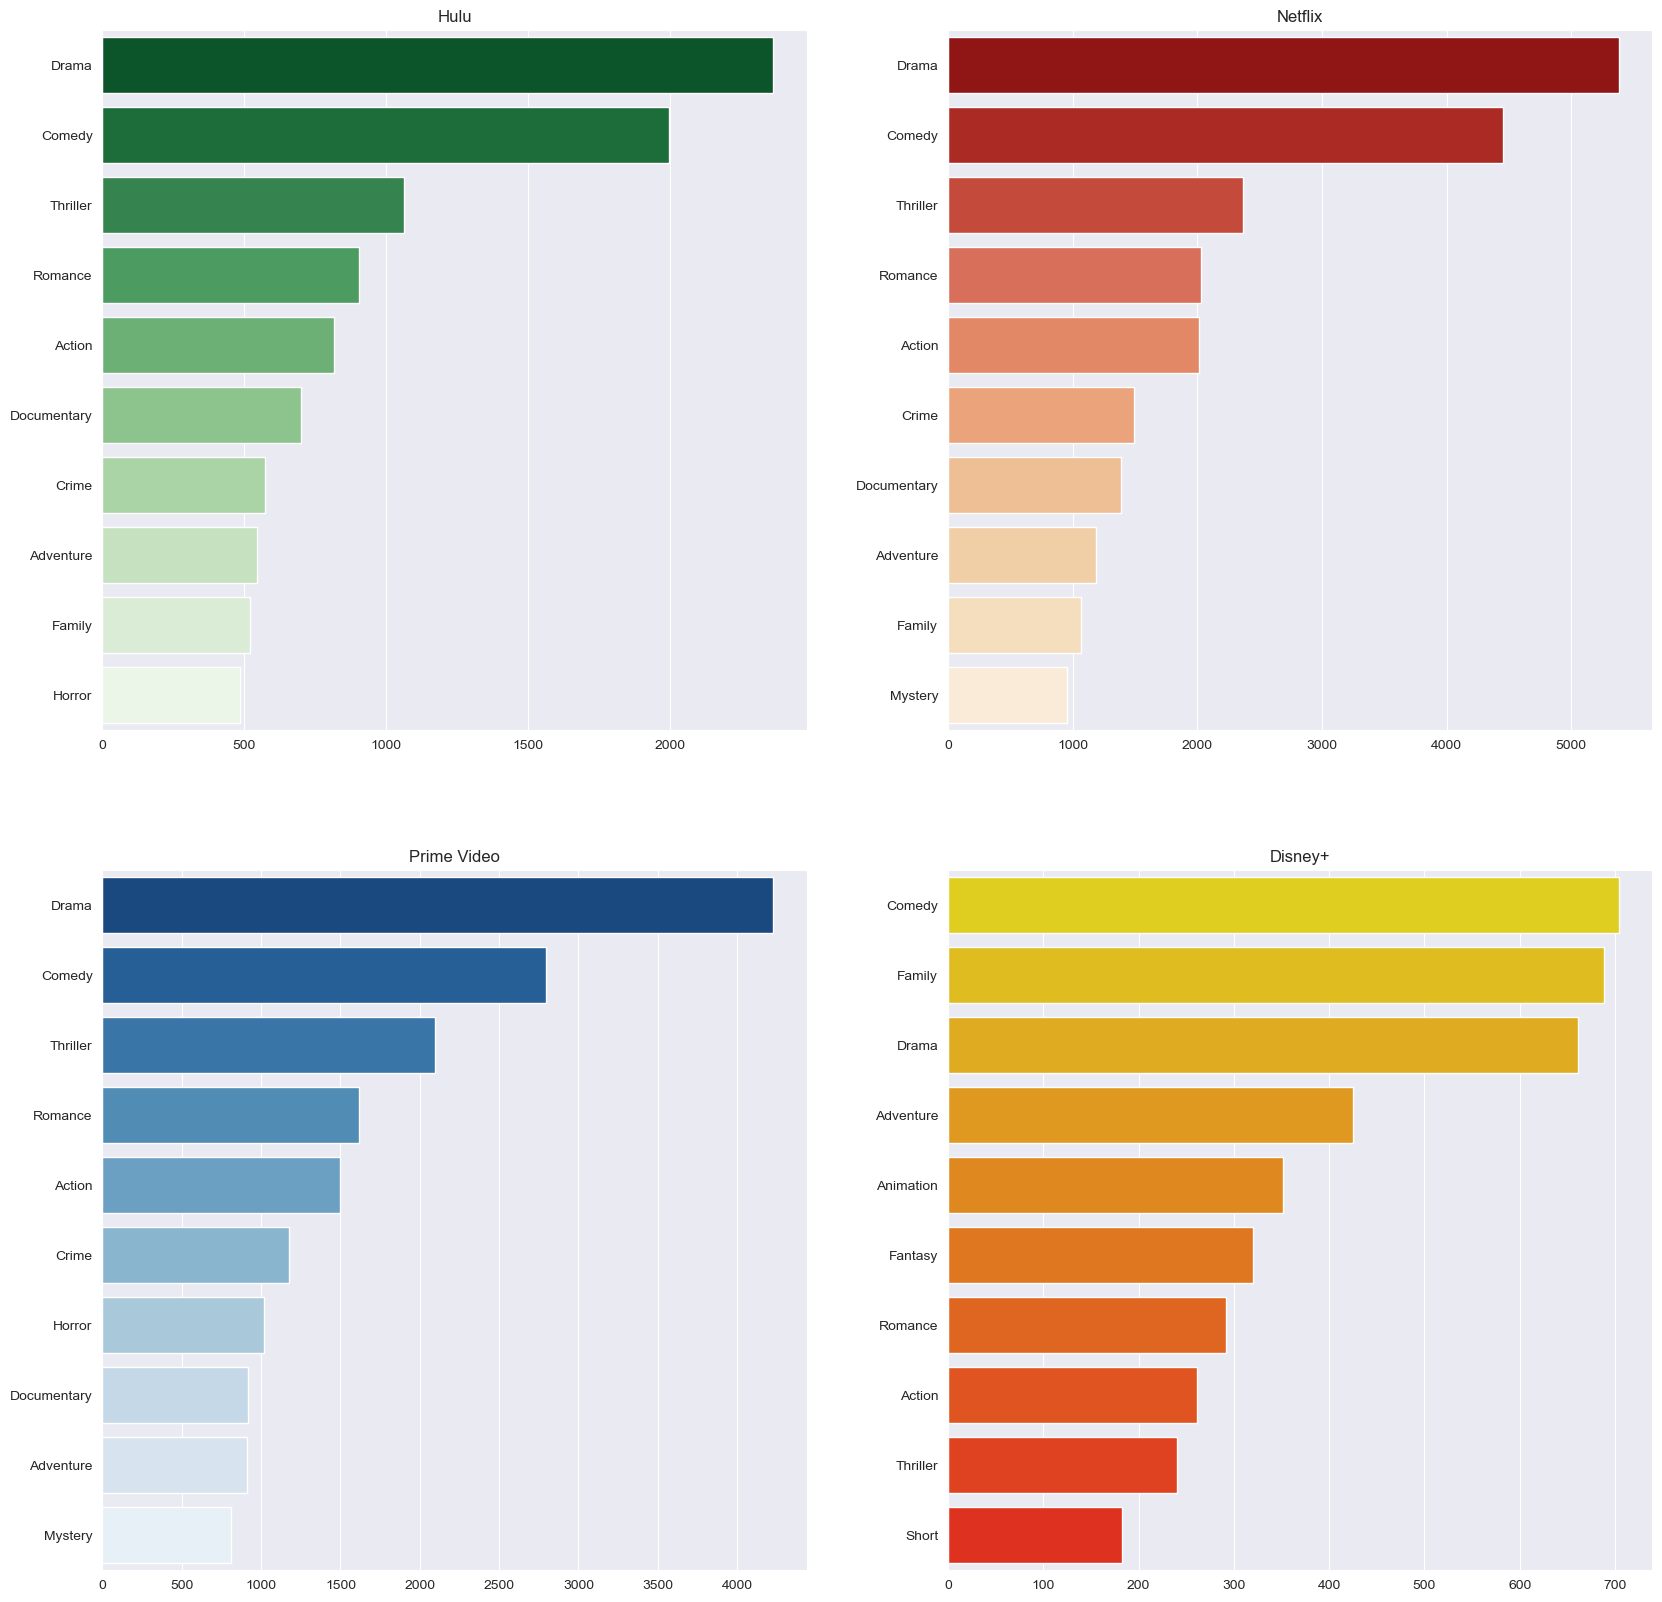

In [184]:
#creating subplots to show each data into a different ax
fix, axes = plt.subplots(2,2, figsize=(20, 20))

#setting titles
axes[0,0].set_title('Hulu')
axes[0,1].set_title('Netflix')
axes[1,0].set_title('Prime Video')
axes[1,1].set_title('Disney+')

#plotting the four barplots using seaborn
sns.barplot(x=hulu_genres_list.values, y=hulu_genres_list.index, ax=axes[0,0],palette='Greens_r')
sns.barplot(x=netflix_genres_list.values, y=netflix_genres_list.index, ax=axes[0,1], palette='OrRd_r')
sns.barplot(x=primevideo_genres_list.values, y=primevideo_genres_list.index, ax=axes[1,0], palette='Blues_r')
sns.barplot(x=disney_genres_list.values, y=disney_genres_list.index, ax=axes[1,1], palette='autumn_r')
plt.show()

# Q4: Better suited for for children or adults

In [130]:
#Counting the number of values for each age classification
#We will be ignoring the movies with an 'Uknown' value in the Age column so it does not affect our graph
hulu_ages = Hulu_df.Age.value_counts().drop('Unknown')
netflix_ages = Netflix_df.Age.value_counts().drop('Unknown')
primevideo_ages = PrimeVideo_df.Age.value_counts().drop('Unknown')
disney_ages = Disney_df.Age.value_counts().drop('Unknown')

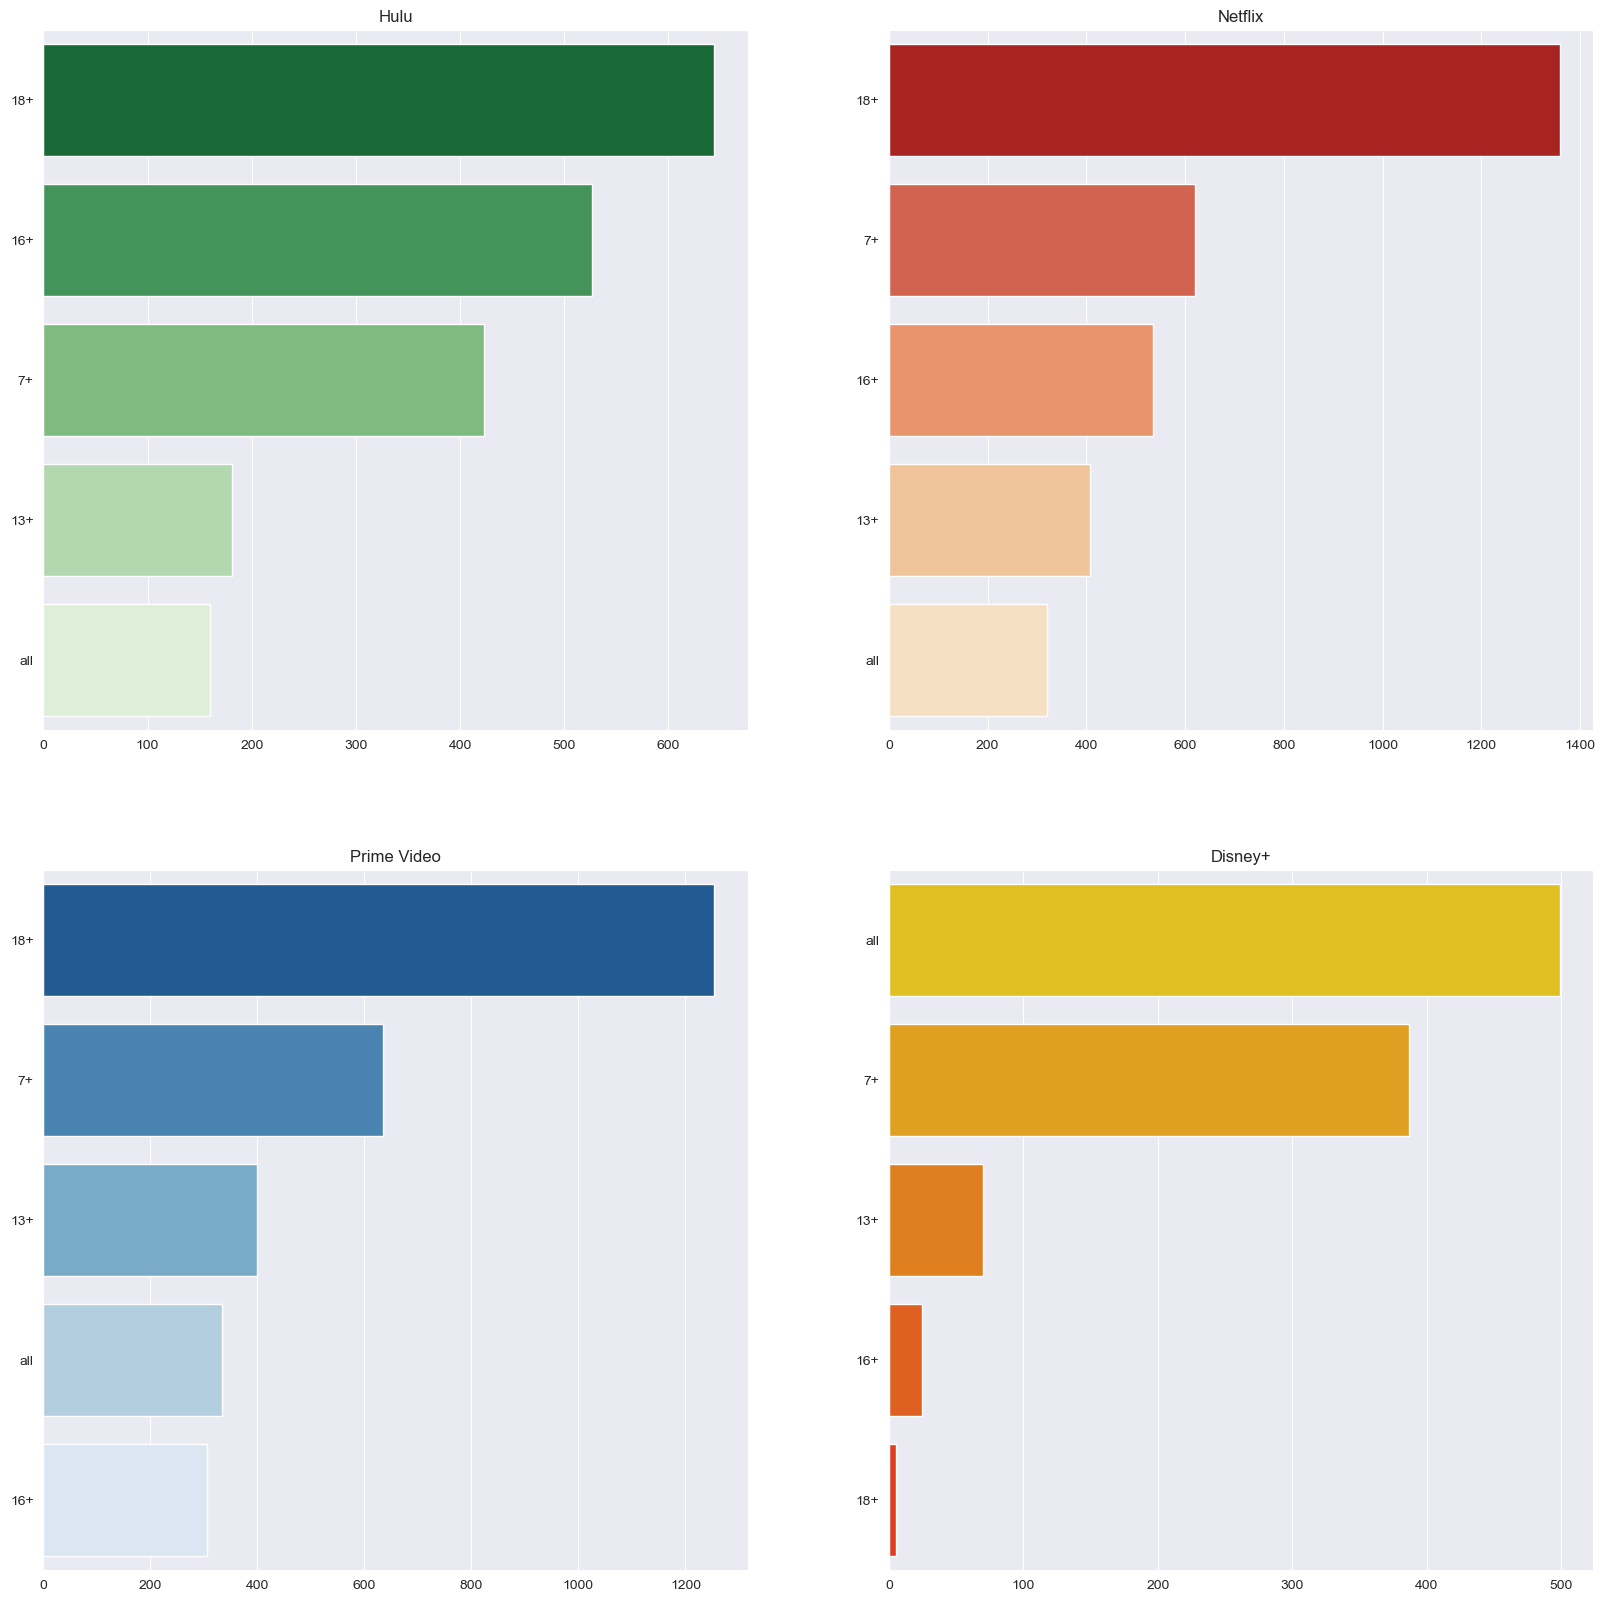

In [129]:
fig, axes = plt.subplots(2,2, figsize=(20, 20))

#setting titles
axes[0,0].set_title('Hulu')
axes[0,1].set_title('Netflix')
axes[1,0].set_title('Prime Video')
axes[1,1].set_title('Disney+')

#plotting the four barplots using seaborn
sns.barplot(x=hulu_ages.values, y=hulu_ages.index, ax=axes[0,0],palette='Greens_r')
sns.barplot(x=netflix_ages.values, y=netflix_ages.index, ax=axes[0,1], palette='OrRd_r')
sns.barplot(x=primevideo_ages.values, y=primevideo_ages.index, ax=axes[1,0], palette='Blues_r')
sns.barplot(x=disney_ages.values, y=disney_ages.index, ax=axes[1,1], palette='autumn_r')

plt.show()

# Q5: The best for old movies and tv shows

In [133]:
#filtering movies released  before 1980  
old_movies_df = movies_data[movies_data.Year < 1980]
old_movies_df.head(2)                              

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
59,60,A Clockwork Orange,1971,18+,8.3,86.0,1,0,0,0,0,Stanley Kubrick,"Crime,Drama,Sci-Fi","United Kingdom,United States",English,136.0
82,83,Monty Python and the Holy Grail,1975,7+,8.2,84.0,1,0,0,0,0,"Terry Gilliam,Terry Jones","Adventure,Comedy,Fantasy",United Kingdom,"English,French,Latin",91.0


In [134]:
#selecting only the needed columns from the dataframe
chosen_columns = ['Hulu', 'Netflix', 'Prime Video', 'Disney+']

#calculating the totals for each column
old_movies = old_movies_df[chosen_columns].sum()
old_movies

Hulu            69
Netflix         41
Prime Video    687
Disney+        197
dtype: int64

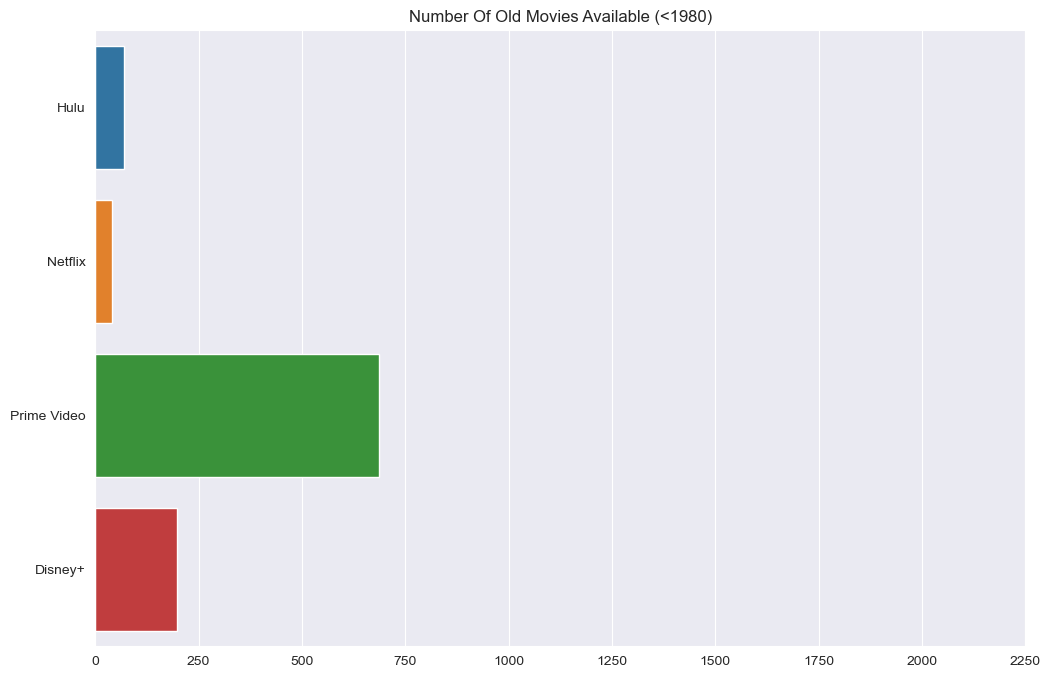

In [136]:
#ploting into a barplot using seaborn
plt.figure(figsize=(12,8))
plt.title('Number Of Old Movies Available (<1980)')
sns.barplot(x=old_movies.values, y=old_movies.index)
plt.xticks(np.arange(0,2500,250))
plt.show()

# Q6: Best IMDb / Rotten Tomatoes ratings

In [137]:
#Creating distinct dataframes only with the movies present on individual streaming platforms

Hulu_imdb = Hulu_df.loc[Hulu_df['IMDb'] > 0 ]
Disney_imdb = Disney_df.loc[Disney_df['IMDb'] > 0 ]
PrimeVideo_imdb = PrimeVideo_df.loc[PrimeVideo_df['IMDb'] > 0 ]
Netflix_imdb = Netflix_df.loc[Netflix_df['IMDb'] > 0 ]

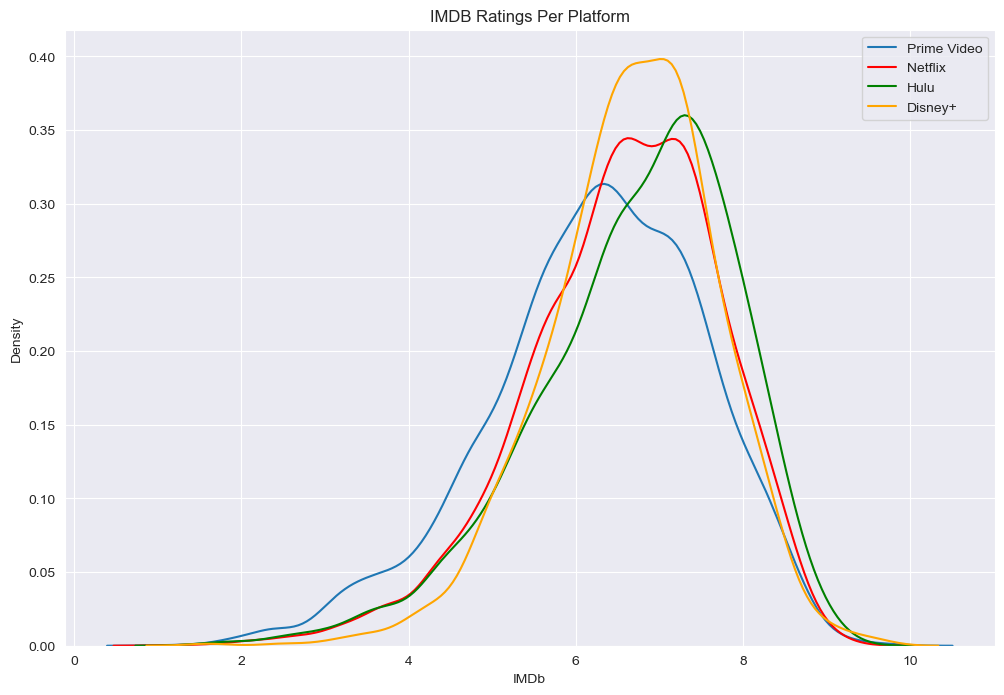

In [145]:
#Defining plot size and title
plt.figure(figsize=(12,8))
plt.title('IMDB Ratings Per Platform')

#Plotting the information from each dataset into a KDE plot
sns.kdeplot(data=PrimeVideo_imdb['IMDb'],  legend=True)
sns.kdeplot(data=Netflix_imdb['IMDb'], color='red',  legend=True)
sns.kdeplot(data=Hulu_imdb['IMDb'], color='green',  legend=True)
sns.kdeplot(data=Disney_imdb['IMDb'], color='orange', legend=True)

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [147]:
#Creating a python dictionary to store the mean for each platform
Means = {}

#obtaining the mean for the IMDb column in each dataset
Means['Prime Video'] = PrimeVideo_imdb.IMDb.mean()
Means['Disney+'] = Disney_imdb.IMDb.mean()
Means['Hulu'] = Hulu_imdb.IMDb.mean()
Means['Netflix'] = Netflix_imdb.IMDb.mean()

Means

{'Prime Video': 6.23557894736842,
 'Disney+': 6.672277227722772,
 'Hulu': 6.712454212454213,
 'Netflix': 6.556175663311985}

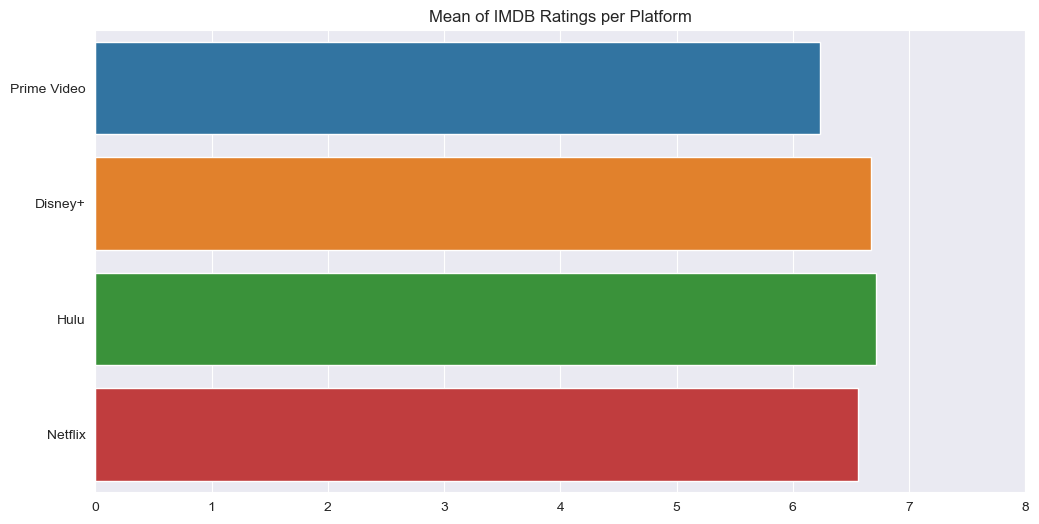

In [148]:
#plotting a horizontal bar and defining figure size, title and xticks
plt.figure(figsize=(12,6))

sns.barplot(y=list(Means.keys()), x=list(Means.values()))
plt.title('Mean of IMDB Ratings per Platform')

plt.xticks([0,1,2,3,4,5,6,7,8])
plt.show()

In [150]:
#Creating distinct dataframes only with the movies present on individual streaming platforms
PrimeVideo_top_movies_df = PrimeVideo_df[(PrimeVideo_df['IMDb'] >= 8)] 
Netflix_top_movies_df = Netflix_df[(Netflix_df['IMDb'] >= 8) ]
Hulu_top_movies_df = Hulu_df[(Hulu_df['IMDb'] >= 8)]
Disney_top_movies_df = Disney_df[(Disney_df['IMDb'] >= 8)] 

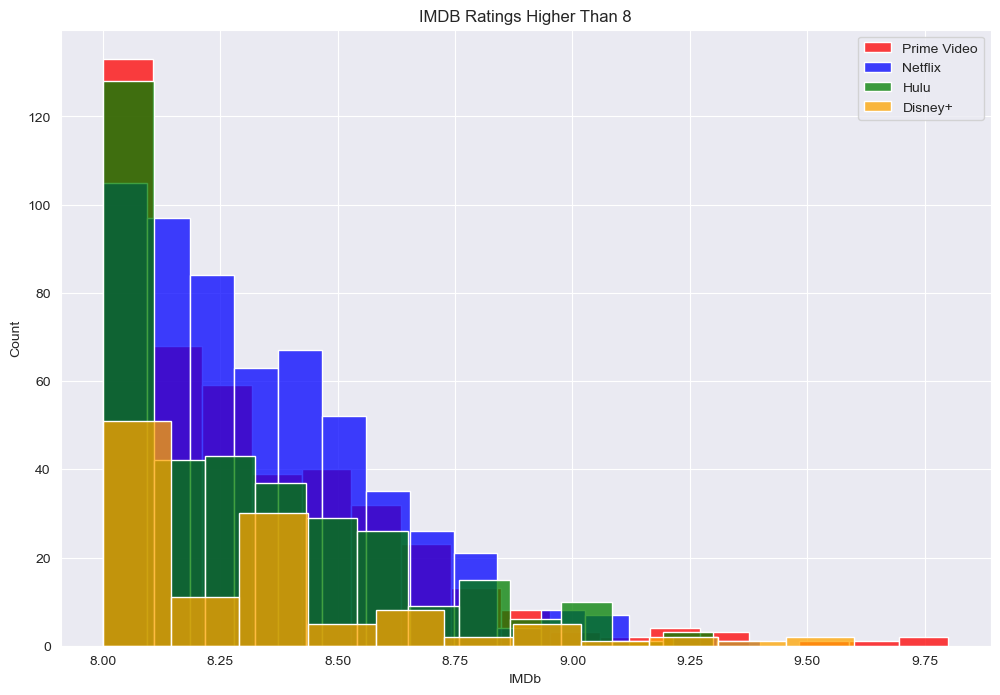

In [154]:
#Defining plot size and title
plt.figure(figsize=(12,8))
plt.title('IMDB Ratings Higher Than 8')

#Plotting the information from each dataset into a histogram
sns.histplot(PrimeVideo_top_movies_df['IMDb'], color='red', kde=False)
sns.histplot(Netflix_top_movies_df['IMDb'], color='blue', kde=False)
sns.histplot(Hulu_top_movies_df['IMDb'], color='green', kde=False)
sns.histplot(Disney_top_movies_df['IMDb'], color='orange', kde=False)                                       
                                      

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [155]:
#creating dataframes for the Rotten Tomatoes column exclusing all empty values
Hulu_rotten_tomatoes = Hulu_df.loc[Hulu_df['Rotten Tomatoes'] != 0 ]
Disney_rotten_tomatoes = Disney_df.loc[Disney_df['Rotten Tomatoes'] != 0 ]
PrimeVideo_rotten_tomatoes = PrimeVideo_df.loc[PrimeVideo_df['Rotten Tomatoes'] != 0 ]
Netflix_rotten_tomatoes = Netflix_df.loc[Netflix_df['Rotten Tomatoes'] != 0 ]

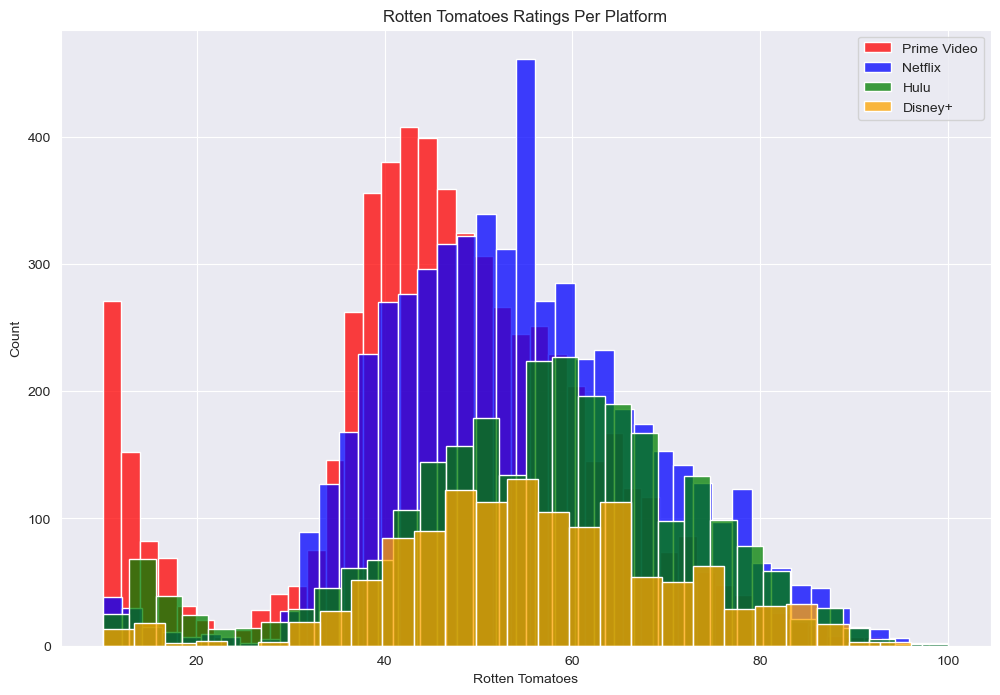

In [158]:
#Defining plot size and title
plt.figure(figsize=(12,8))
plt.title('Rotten Tomatoes Ratings Per Platform')

#Plotting the information from each dataset into a KDE plot
sns.histplot(PrimeVideo_rotten_tomatoes['Rotten Tomatoes'], color='red', kde=False,  legend=True)
sns.histplot(Netflix_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='blue',  legend=True)
sns.histplot(Hulu_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='green',  legend=True)
sns.histplot(Disney_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='orange', legend=True)

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [187]:
#getting the mean of Rotten Tomatoes ratings for each:
Means_rt = {}

#obtaining the mean for the IMDb column in each dataset
Means_rt['Prime Video'] = PrimeVideo_rotten_tomatoes['Rotten Tomatoes'].mean()
Means_rt['Disney+'] = Disney_rotten_tomatoes['Rotten Tomatoes'].mean()
Means_rt['Hulu'] = Hulu_rotten_tomatoes['Rotten Tomatoes'].mean()
Means_rt['Netflix'] = Netflix_rotten_tomatoes['Rotten Tomatoes'].mean()

Means_rt

{'Prime Video': 46.50588829071332,
 'Disney+': 55.86174391201885,
 'Hulu': 55.80434782608695,
 'Netflix': 54.138363668492666}

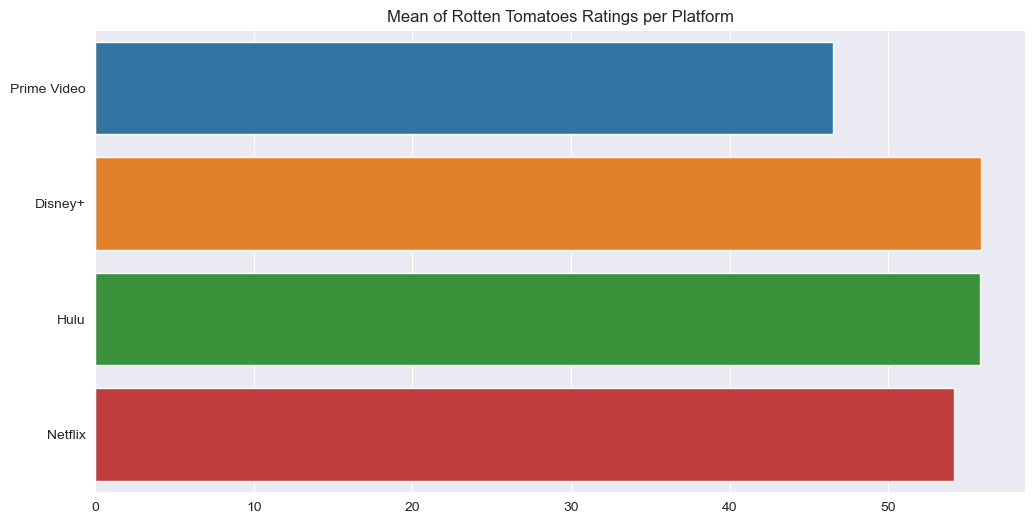

In [188]:
#plotting a horizontal bar and defining figure size, title and xticks
plt.figure(figsize=(12,6))

sns.barplot(x=list(Means_rt.values()), y=list(Means_rt.keys()))
plt.title('Mean of Rotten Tomatoes Ratings per Platform')

plt.show()

# Inferences
1. Quantity of Movies: Prime Video is by far the service with more movies and tv shows, followed by Netflix. Netflix, Hulu and Disney+ together still don't reach half the quantity of movies available on Prime Video.

2. Recent Titles: Prime Video is also the catalog with the biggest quantity of recent movies (10 years old or less). But this represents only 50% of its catalog. On the other hand, Netflix and Hulu have a much bigger percentage of their catalogs composed by recent movies - 82% and 67% respectively. And Disney+ has surprisingly only 36%! Which means their movie catalog is currently mostly of classics.

3. Genres: Hulu, Netflix and PrimeVideo have very similar quantities for the top genres, with Drama, Comedy and Thriller being the top three ones. Disney+ has a different catalog, with Family, Adventure, Fantasy, Animation and Musical being the most predomintant genres.

4. Age: Adult movies (18+) is the biggest part of the Netflix, Prime Video and Hulu catalogs, although they also offer a good quantity of movies for children and teenagers. Disney+, focuses primarily on movies for the whole family and children. It is safe to say that more than 90% of its catalog can be watched by children.

5. Old Movies: Prime Video has really focused on the classics! That helps to explains why it has such a huge catalog when compared to the other services. About 2K of the total catalog is from movies prior to 1980.

6. Movie Ratings: Hulu has the best mean ratings for both IMDB and Rotten Tomatoes. All platforms offer a good quantity of well rated movies in their catalog. However, the Prime Video ratings mean is much lower compared to the other platforms. We can conclude that the overall quality os the Hulu and Netflix catalogs are much better. Having more movies and series does not mean having the best catalog.

# Conclusions
What can help me decide between a specific platform?

1. If you are interested on having a huge catalog Prime Video is definitely a good choice. Netflix comes second and is also a good choice - both have a big catalog!

2. For watching recent movies and tv shows (last decade), Netflix is a great option - those compose 81% of its catalog. Hulu also has a good percentage of 67%.

3. If you are interested in movies for Adults, and genres such as Dramas, Comedies and Thriller, Netflix , Hulu and Prime Video are all good options.

4. Disney+ is defintely a great choice for family friendly movies and genres such as fantasy and adventure.
Prime Video seems to be the best platform for watching very old movies (40 years old or more) since it offers about 2K movies prior to 1980.

5. Hulu has a smaller catalog, but it comes first on the ratings mean. If you are interested in having a small catalog with good quality stuff, Hulu may be the best choice. Disney+ also has a small catalog while keeping a good overall quality. Its catalog should increase during the next years since it is a new service. Netflix is a good middle term between having a big catalog x quality. Prime Video comes last on ratings, a consequence of having such a huge catalog.